# Students Dropout Prediction

## Data Analysis

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the dataset
df = pd.read_csv("./Dataset/data.csv", sep=";")

In [3]:
#Printing the first 5 rows. 

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Check dataset shape

df.shape

(4424, 37)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
# Descriptive statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [7]:
# Check  or missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

From this it is clear that there are no null values in the dataset. 

In [8]:
# Columns in the dataset
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [9]:
# Remove single quotation and tab character from column names
df.columns.str.strip()
df.columns = df.columns.str.replace("'", "").str.replace("\t", "")

In [10]:
# Rename all the columns with underscore

df.rename(columns = {
    'Marital status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance': 'daytime_evening_attendance',
    'Previous qualification': 'previous_qualification',
    'Previous qualification (grade)': 'previous_qualification_grade',
    'Nacionality': 'nacionality',
    'Mothers qualification': 'mothers_qualification',
    'Fathers qualification': 'fathers_qualification',
    'Mothers occupation': 'mothers_occupation',
    'Fathers occupation': 'fathers_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'educational_special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'curricular_units_1st_sem_credited',
    'Curricular units 1st sem (enrolled)': 'curricular_units_1st_sem_enrolled',
    'Curricular units 1st sem (evaluations)': 'curricular_units_1st_sem_evaluations',
    'Curricular units 1st sem (approved)': 'curricular_units_1st_sem_approved',
    'Curricular units 1st sem (grade)': 'curricular_units_1st_sem_grade',
    'Curricular units 1st sem (without evaluations)': 'curricular_units_1st_sem_without_evaluations',
    'Curricular units 2nd sem (credited)': 'curricular_units_2nd_sem_credited',
    'Curricular units 2nd sem (enrolled)': 'curricular_units_2nd_sem_enrolled',
    'Curricular units 2nd sem (evaluations)': 'curricular_units_2nd_sem_evaluations',
    'Curricular units 2nd sem (approved)': 'curricular_units_2nd_sem_approved',
    'Curricular units 2nd sem (grade)': 'curricular_units_2nd_sem_grade',
    'Curricular units 2nd sem (without evaluations)': 'curricular_units_2nd_sem_without_evaluations',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}, inplace=True)


In [11]:
# Define the categorical and numerical columns

categorical_columns = ['marital_status','application_mode', 'application_order', 'course', 'daytime_evening_attendance','previous_qualification','nacionality',
                       'mothers_qualification','fathers_occupation', 'displaced', 'educational_special_needs','debtor','tuition_fees_up_to_date','gender','scholarship_holder','international']




numerical_columns = ['previous_qualification_grade','admission_grade', 'age_at_enrollment','curricular_units_1st_sem_credited','curricular_units_1st_sem_enrolled',
                     'curricular_units_1st_sem_evaluations','curricular_units_1st_sem_approved','curricular_units_1st_sem_grade','curricular_units_1st_sem_without_evaluations',
                     'curricular_units_2nd_sem_credited','curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations','curricular_units_2nd_sem_approved',
                     'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations','unemployment_rate','inflation_rate', 'gdp' ]

In [12]:
# int datatype to object
for col in categorical_columns:
  df[col] = df[col].astype('object')

In [13]:
# Checking for duplicates
df.duplicated().sum()

0

In [14]:
# Counting the unique values in Categorical columns

for col in categorical_columns:
  print(col + "---" + str(df[col].nunique()))

marital_status---6
application_mode---18
application_order---8
course---17
daytime_evening_attendance---2
previous_qualification---17
nacionality---21
mothers_qualification---29
fathers_occupation---46
displaced---2
educational_special_needs---2
debtor---2
tuition_fees_up_to_date---2
gender---2
scholarship_holder---2
international---2


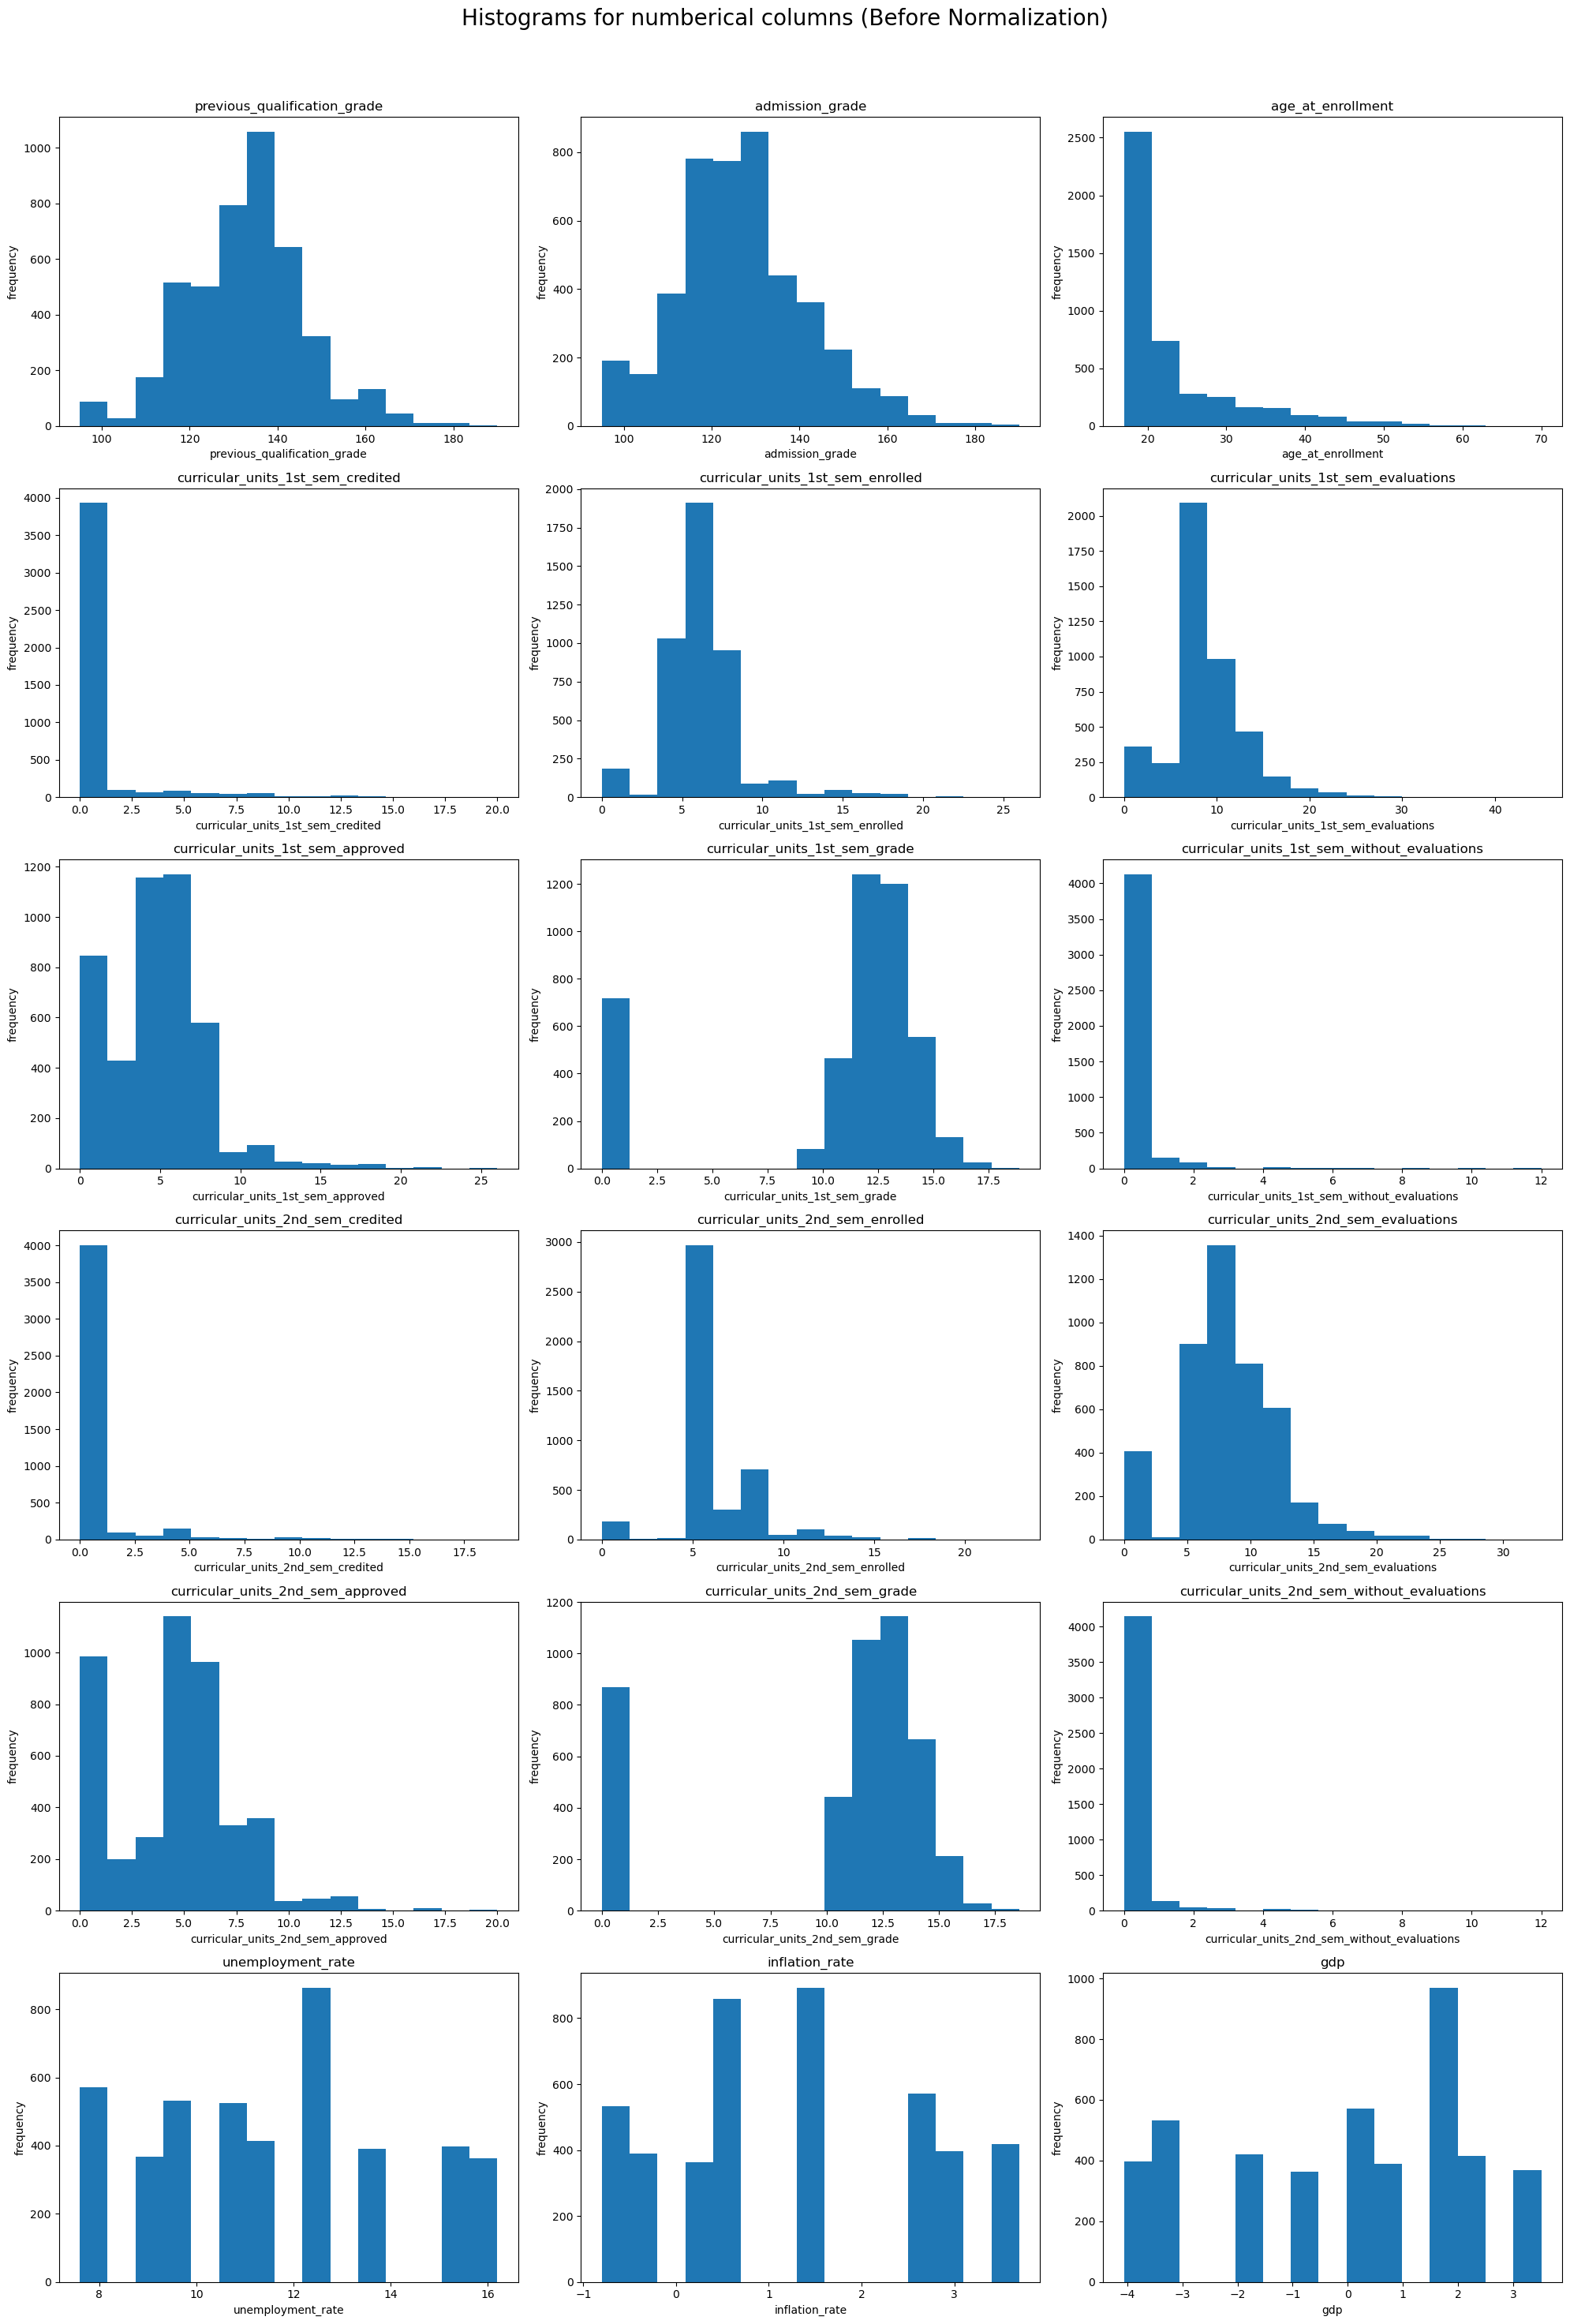

In [15]:
# Visualizing the distribution of numberical columns

fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle(
    "Histograms for numberical columns (Before Normalization)", fontsize=20)


axes = axes.flatten()


for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=15)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("frequency")


plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [16]:
# Define key value pair information to understand data relations

data_copy = df.copy()
for col in categorical_columns:
    if col == 'marital_status':
      data_copy[col] = data_copy[col].map({1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'})
    elif col == 'gender':
      data_copy[col] = data_copy[col].map({1: 'male', 0: 'female'})
    elif col == 'scholarship_holder':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'tuition_fees_up_to_date':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'debtor':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'tuition_fees_up_to_date':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col =='nacionality':
      data_copy[col] = data_copy[col].map({1 :'Portuguese', 2 : 'German', 6 : 'Spanish', 11 : 'Italian', 13 : 'Dutch', 14 : 'English', 17 : 'Lithuanian', 21 : 'Angolan', 22 : 'Cape Verdean', 24 : 'Guinean', 25 : 'Mozambican', 26 : 'Santomean', 32 : 'Turkish', 41 : 'Brazilian', 62 : 'Romanian', 100 : 'Moldova (Republic of)', 101 : 'Mexican', 103 : 'Ukrainian', 105 : 'Russian', 108 : 'Cuban', 109 : 'Colombian'})
    elif col == 'course':
       data_copy[col]= data_copy[col].map({33: 'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:  'Social Service (evening attendance)', 9003: 'Agronomy', 9070 : 'Communication Design', 9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130 : 'Equinculture', 9147 : 'Management', 9238 : 'Social Service', 9254 : 'Tourism', 9500: 'Nursing', 9556 : 'Oral Hygiene', 9670 : 'Advertising and Marketing Management', 9773 : 'Journalism and Communication', 9853 : 'Basic Education', 9991 : 'Management (evening attendance)'})

### Analyse students relation

In [17]:
# Check how many students of the dataset are international and non international

data_copy['international'].value_counts()

international
0    4314
1     110
Name: count, dtype: int64

In [18]:
# Check the predominance of internacional students

data_copy.groupby('international')['nacionality'].value_counts()

international  nacionality          
0              Portuguese               4314
1              Brazilian                  38
               Santomean                  14
               Cape Verdean               13
               Spanish                    13
               Guinean                     5
               Italian                     3
               Moldova (Republic of)       3
               Ukrainian                   3
               Angolan                     2
               German                      2
               Mexican                     2
               Mozambican                  2
               Romanian                    2
               Russian                     2
               Colombian                   1
               Cuban                       1
               Dutch                       1
               English                     1
               Lithuanian                  1
               Turkish                     1
Name: count, dtype

Text(0.5, 0, 'Tuition Fees Up to Date')

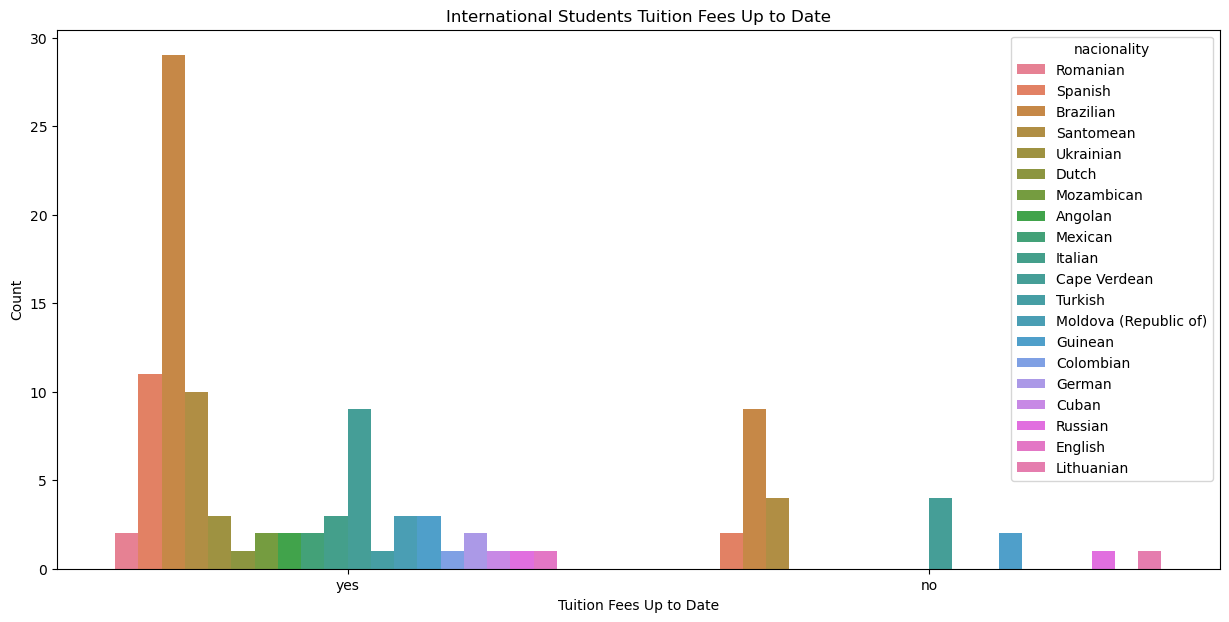

In [19]:
#  Inspect which nationalities are up to date with tuition fees

internacional_students = data_copy.query('international == 1' )

plt.figure(figsize=(15,7))

ax = sns.countplot(x ='tuition_fees_up_to_date', hue = "nacionality", data = internacional_students)
ax.set_title('International Students Tuition Fees Up to Date')
ax.set_ylabel('Count')
ax.set_xlabel('Tuition Fees Up to Date')

Text(0.5, 0, 'Tuition Fees Up to Date')

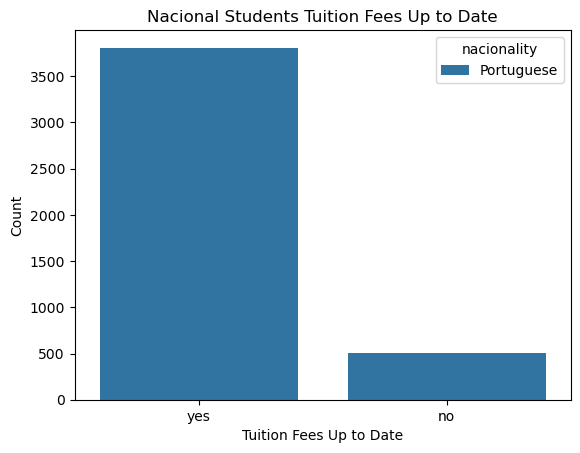

In [20]:
#  Inspect nacional students up to date with tuition fees

nacional_students = data_copy.query('international == 0' )

ax = sns.countplot(x ='tuition_fees_up_to_date', hue = "nacionality", data = nacional_students)
ax.set_title('Nacional Students Tuition Fees Up to Date')
ax.set_ylabel('Count')
ax.set_xlabel('Tuition Fees Up to Date')

### Analyse relation beetween features Debtor and Admission grade

In [21]:
fig = px.histogram(data_copy, x="admission_grade", color="debtor")
fig.update_layout(barmode='overlay')
fig.update_xaxes(title='Admission grade')
fig.update_yaxes(title='Count values')
fig.update_layout(
    title_text='Debtor Type x Admission grade')

fig.show()

### Analyse Marital Status and Previous qualification grade

In [22]:
# Check unique values of Previous qualification grade

data_copy['previous_qualification_grade'].unique()

array([122. , 160. , 100. , 133.1, 142. , 119. , 137. , 138. , 139. ,
       136. , 133. , 110. , 149. , 127. , 135. , 140. , 125. , 126. ,
       151. , 115. , 150. , 143. , 130. , 120. , 103. , 154. , 132. ,
       167. , 129. , 141. , 116. , 148. , 118. , 106. , 121. , 114. ,
       124. , 123. , 113. , 111. , 131. , 158. , 146. , 117. , 153. ,
       178. ,  99. , 134. , 128. , 170. , 155. , 145. , 152. , 112. ,
       107. , 156. , 188. ,  96. , 161. , 166. , 147. , 144. , 102. ,
       101. , 180. , 172. , 105. , 108. , 165. , 190. , 162. , 164. ,
       163. , 159. , 117.4, 175. , 133.8, 176. , 168. , 139.3,  97. ,
       157. , 140.8, 184.4, 148.9, 109. , 174. , 182. , 138.6,  95. ,
       154.4, 163.3, 145.7, 123.9, 124.4, 169. , 177. , 138.7, 119.1,
       118.9, 126.6])

In [23]:
# Define a frequecy of a Previous qualification grade related to Marital status type

marital_status_previous_qualification_grade =  data_copy.groupby('marital_status')['previous_qualification_grade'].value_counts().reset_index(name='count')
marital_status_previous_qualification_grade

,marital_status,previous_qualification_grade,count
0,divorced,133.1,40
1,divorced,140.0,13
2,divorced,130.0,12
3,divorced,120.0,7
4,divorced,100.0,5
...,...,...,...
160,single,188.0,1
161,widower,120.0,1
162,widower,135.0,1
163,widower,138.0,1


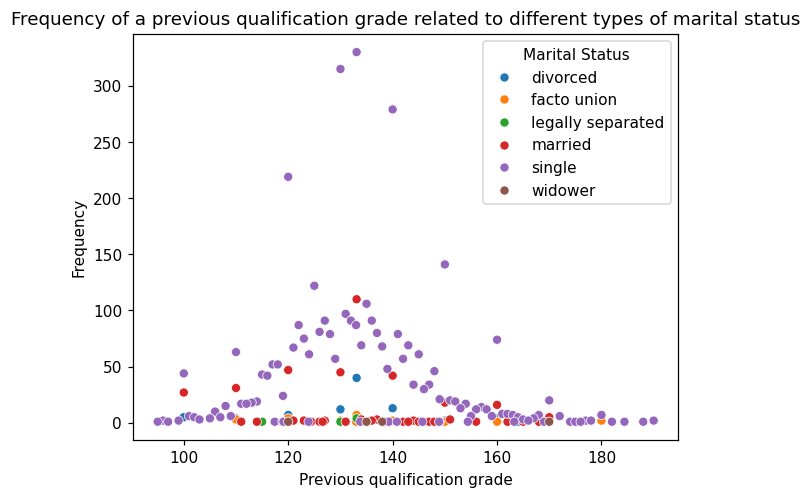

In [24]:
# Graph showing the frequency of a Previous qualification grade related to different types of Marital status

plt.rcParams["figure.dpi"] = 110
sns.scatterplot(
   x="previous_qualification_grade",
   y="count",
   data=marital_status_previous_qualification_grade,
   hue='marital_status',
)

plt.title("Frequency of a previous qualification grade related to different types of marital status")
plt.xlabel("Previous qualification grade")
plt.ylabel("Frequency")


plt.legend(title="Marital Status")

plt.show()

### Analyse relation beetween Gender and Unemployment rate

Text(0.5, 1.0, ' Unemployment rate frequency per Gender')

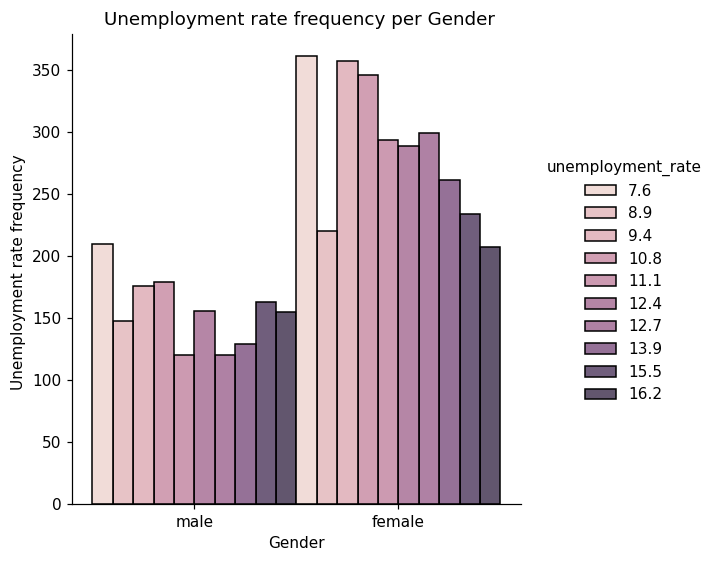

In [25]:
# Compare Unemployment rate frequency related to Gender type

sns.displot(data_copy, x="gender", hue="unemployment_rate",multiple="dodge")

plt.xlabel("Gender")
plt.ylabel("Unemployment rate frequency ")
plt.title(" Unemployment rate frequency per Gender")

### Analyse feature courses

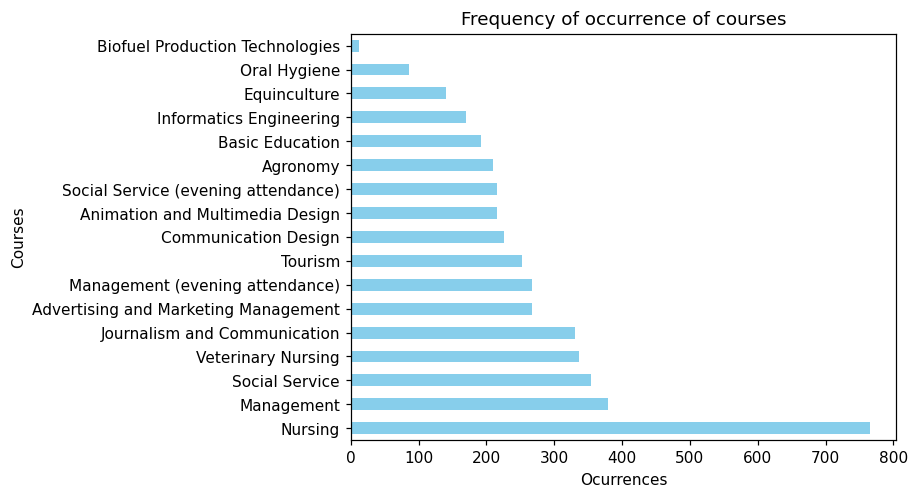

In [26]:
# Verify the total occurences of students for each curse

data_copy["course"].value_counts().plot(kind='barh', color='skyblue')

plt.title("Frequency of occurrence of courses")
plt.xlabel("Ocurrences")
plt.ylabel("Courses")
plt.show()

In [27]:
# Analyse Tuition fees up to date status per Curse

import plotly.express as px

fig = px.histogram(data_copy, x="course", color="tuition_fees_up_to_date")

fig.update_layout(title="Distribution of Courses by Tuition Fee Up to Date Status")
fig.update_xaxes(title="Courses")
fig.update_yaxes(title="Total")
fig.update_legends(title='Tuititon Fee Status')
fig.update_layout(barmode='overlay')

fig.show()

### Analyse Scholarship holder relations


In [28]:
# Check total of non Scholarship Holders x Scholarship Holders

data_copy['scholarship_holder'].value_counts()

scholarship_holder
no     3325
yes    1099
Name: count, dtype: int64

In [29]:
# Define the frequency of a non Scholarship holders and Scholarship holders related to a total approved curricular units in the 1st semester

scholarship_holder_curricular_approved_1 =  data_copy.groupby('scholarship_holder')['curricular_units_1st_sem_approved'].value_counts().reset_index(name='count')
scholarship_holder_curricular_approved_1

,scholarship_holder,curricular_units_1st_sem_approved,count
0,no,6,723
1,no,0,644
2,no,5,542
3,no,4,355
4,no,7,281
5,no,3,239
6,no,2,146
7,no,1,113
8,no,8,70
9,no,11,40


In [30]:
# Define the frequency of a non Scholarship holders and Scholarship holders related to a total approved curricular units in the 2nd semester

scholarship_holder_curricular_approved_2 =  data_copy.groupby('scholarship_holder')['curricular_units_2nd_sem_approved'].value_counts().reset_index(name='count')
scholarship_holder_curricular_approved_2

,scholarship_holder,curricular_units_2nd_sem_approved,count
0,no,0,778
1,no,6,575
2,no,5,541
3,no,4,341
4,no,3,242
5,no,7,200
6,no,8,191
7,no,2,181
8,no,1,106
9,no,9,34


In [31]:
# Define function to plot two graphics

def plot_curricular_approval(data, column_name, title, xlabel, color):

    # Create a FacetGrid for the given data
    g = sns.FacetGrid(data, col="scholarship_holder", col_wrap=4, height=4)

    # Plot the data using a barplot
    g.map(sns.barplot, column_name, 'count',
          order=data[column_name].unique(),color=color)

    g.set_axis_labels(xlabel, 'Count')
    g.set_titles('{col_name}')
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(title, fontsize=9, ha='right')
    plt.show()

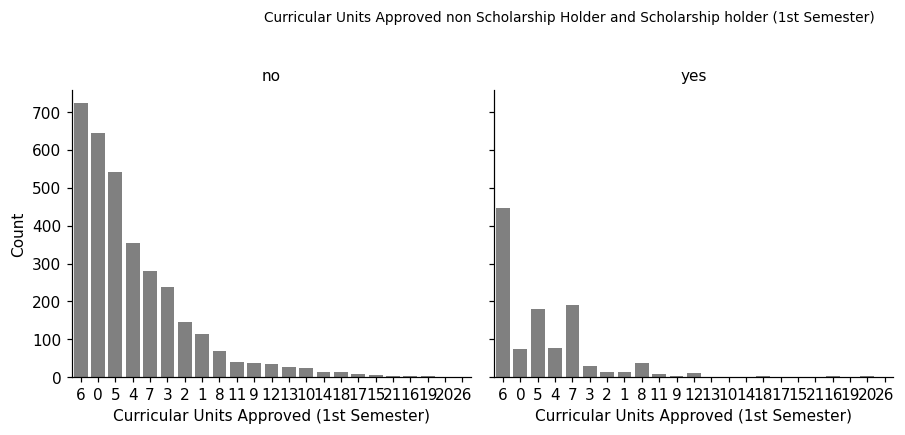

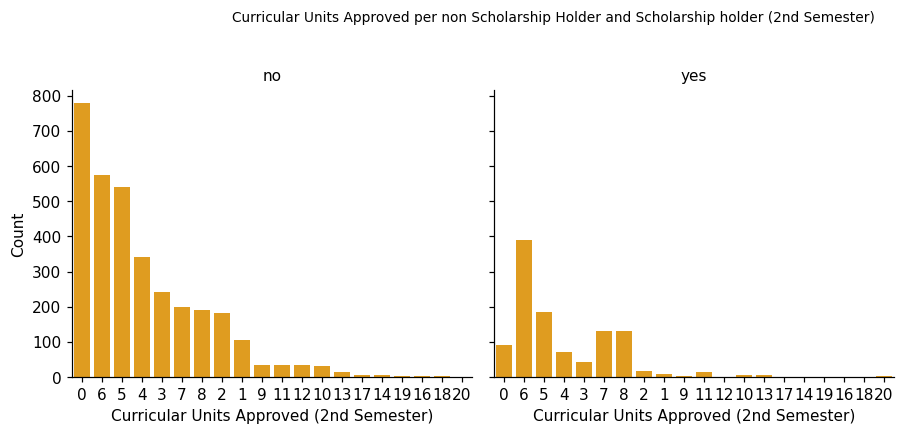

In [32]:
plot_curricular_approval(scholarship_holder_curricular_approved_1, 'curricular_units_1st_sem_approved',
                         'Curricular Units Approved non Scholarship Holder and Scholarship holder (1st Semester)', 'Curricular Units Approved (1st Semester)', 'grey')

plot_curricular_approval(scholarship_holder_curricular_approved_2, 'curricular_units_2nd_sem_approved',
                         'Curricular Units Approved per non Scholarship Holder and Scholarship holder (2nd Semester)', 'Curricular Units Approved (2nd Semester)', 'orange')

### Analyse features distribution

/var/folders/qr/rqfn293x3zzgp2bfm_29pzk00000gn/T/ipykernel_81782/2639962778.py:8: UserWarning:

The `weights` parameter has no effect with kind='count'.

/var/folders/qr/rqfn293x3zzgp2bfm_29pzk00000gn/T/ipykernel_81782/2639962778.py:8: UserWarning:

The `weights` parameter has no effect with kind='count'.

/var/folders/qr/rqfn293x3zzgp2bfm_29pzk00000gn/T/ipykernel_81782/2639962778.py:8: UserWarning:

The `weights` parameter has no effect with kind='count'.

/var/folders/qr/rqfn293x3zzgp2bfm_29pzk00000gn/T/ipykernel_81782/2639962778.py:8: UserWarning:

The `weights` parameter has no effect with kind='count'.



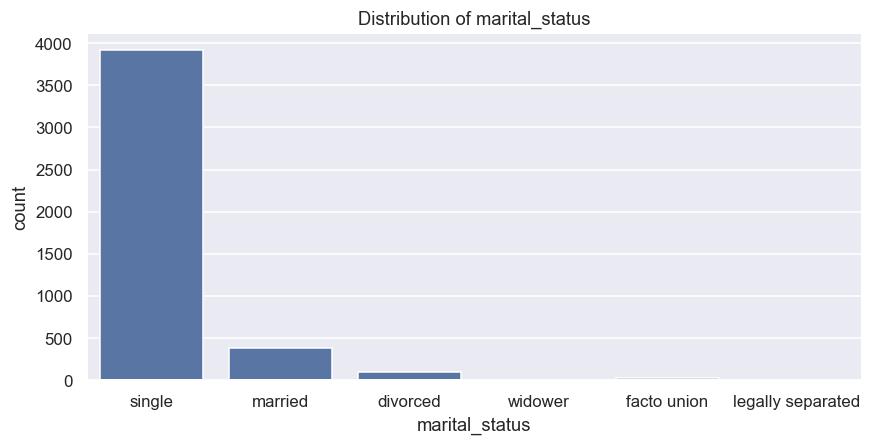

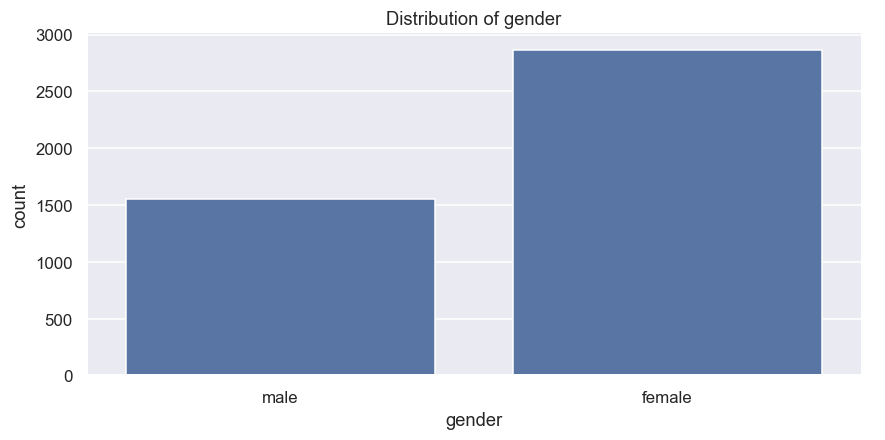

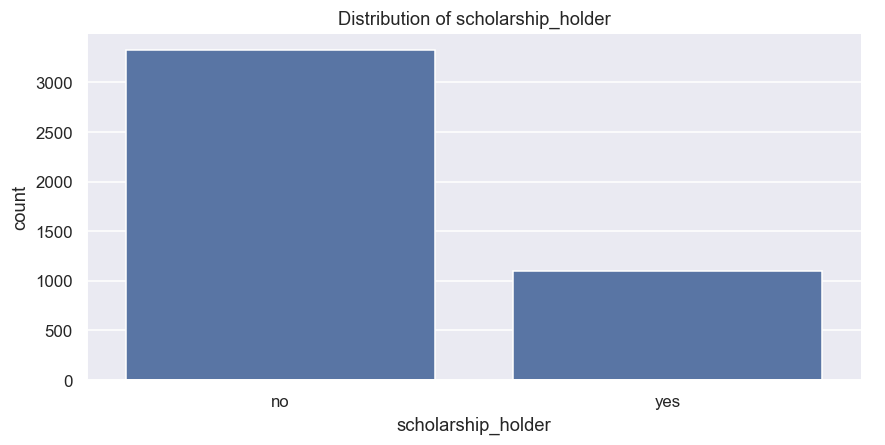

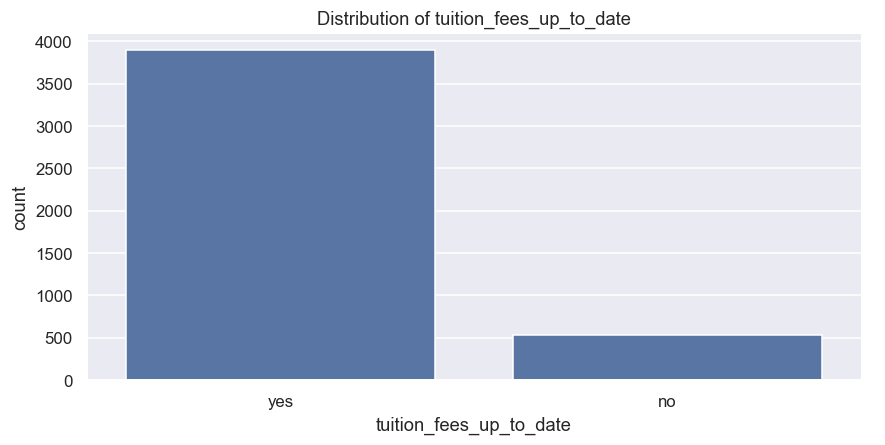

In [33]:
# Verify the distribution of categorical columns variables in the data

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, aspect: int = 2):
    sns.set_palette("hls", 8)
    width = 20
    height = 8
    sns.set(rc = {'figure.figsize':(width, height)})
    sns.catplot(data=data, x=column, kind='count', height=4, weights=9, aspect=aspect).set(
        title=f'Distribution of {column}'
    )

for col in ['marital_status','gender','scholarship_holder','tuition_fees_up_to_date']:
    plot_categorical_distribution(data=data_copy, column=col)

([<matplotlib.patches.Wedge at 0x17d1d7a40>,
 [Text(0.002343419780870056, 1.0999975038079546, 'Graduate'),
  Text(-0.5898578631155683, -0.9284760100943565, 'Dropout'),
  Text(0.9297305530057497, -0.5878784728220818, 'Enrolled')],
 [Text(0.0012782289713836666, 0.5999986384407024, '49.9%'),
  Text(-0.3217406526084918, -0.5064414600514672, '32.1%'),
  Text(0.5071257561849543, -0.3206609851756809, '17.9%')])

<Figure size 660x660 with 0 Axes>

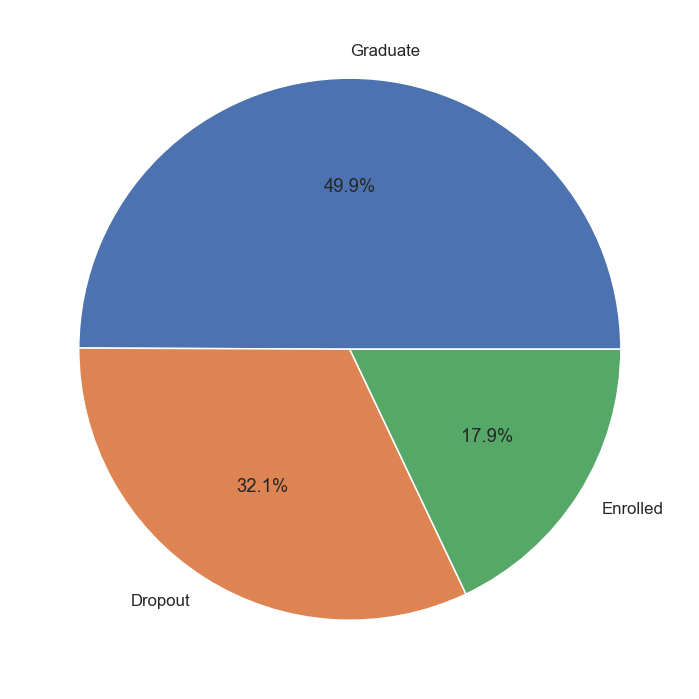

In [34]:
# Create a pie chart graph to vizualize distribution of Target values

plt.figure(figsize=(6, 6))

fig, ax = plt.subplots()
ax.pie(df['target'].value_counts(), labels=df['target'].value_counts().index.to_list(), autopct='%1.1f%%')

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

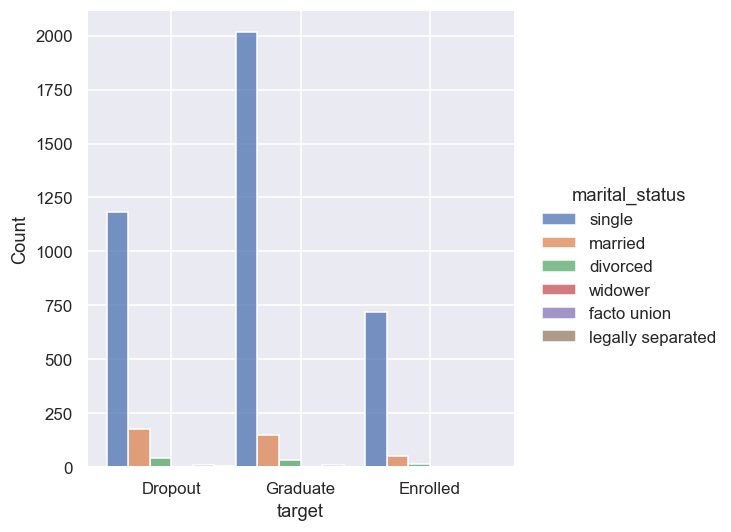

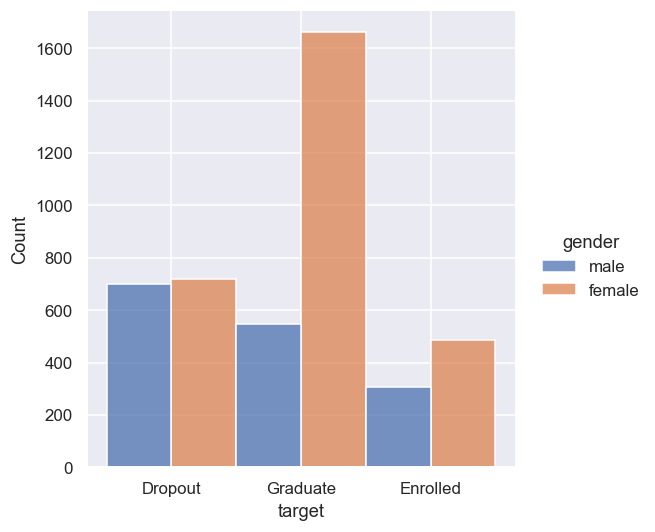

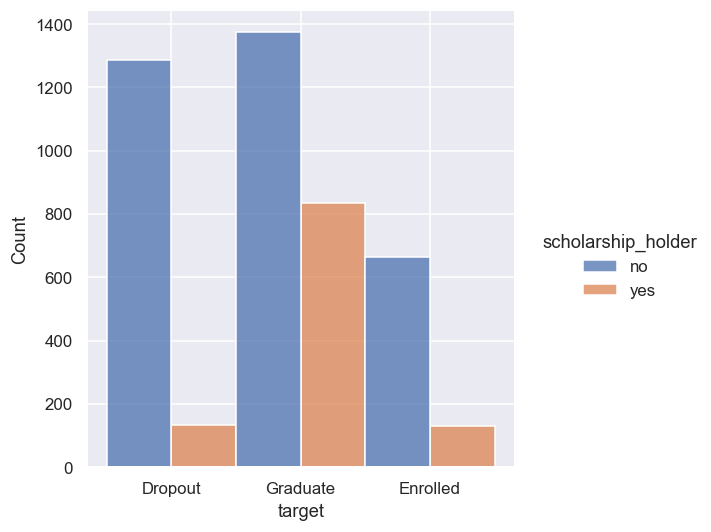

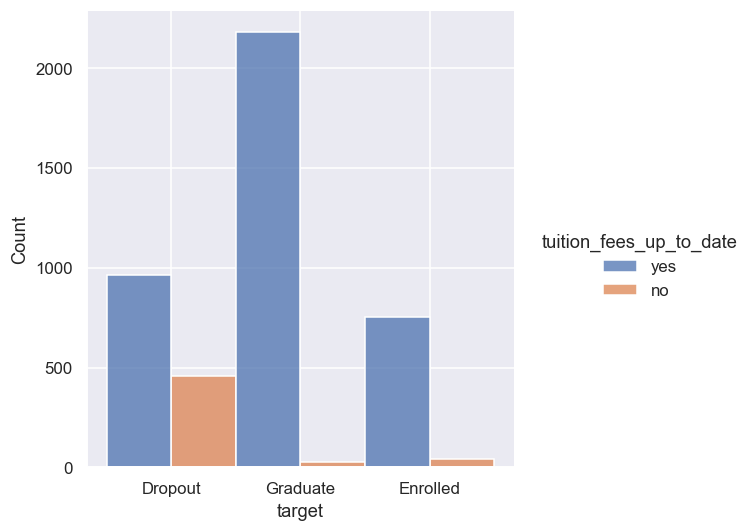

In [35]:
# Categorical columns distribution related to target values

for col in ['marital_status','gender','scholarship_holder','tuition_fees_up_to_date']:
  data_copy.groupby(['target',col])[col].count().sort_values(ascending=False)
  sns.displot(data_copy, x="target", hue=col,multiple="dodge")

### Outlier Inspection

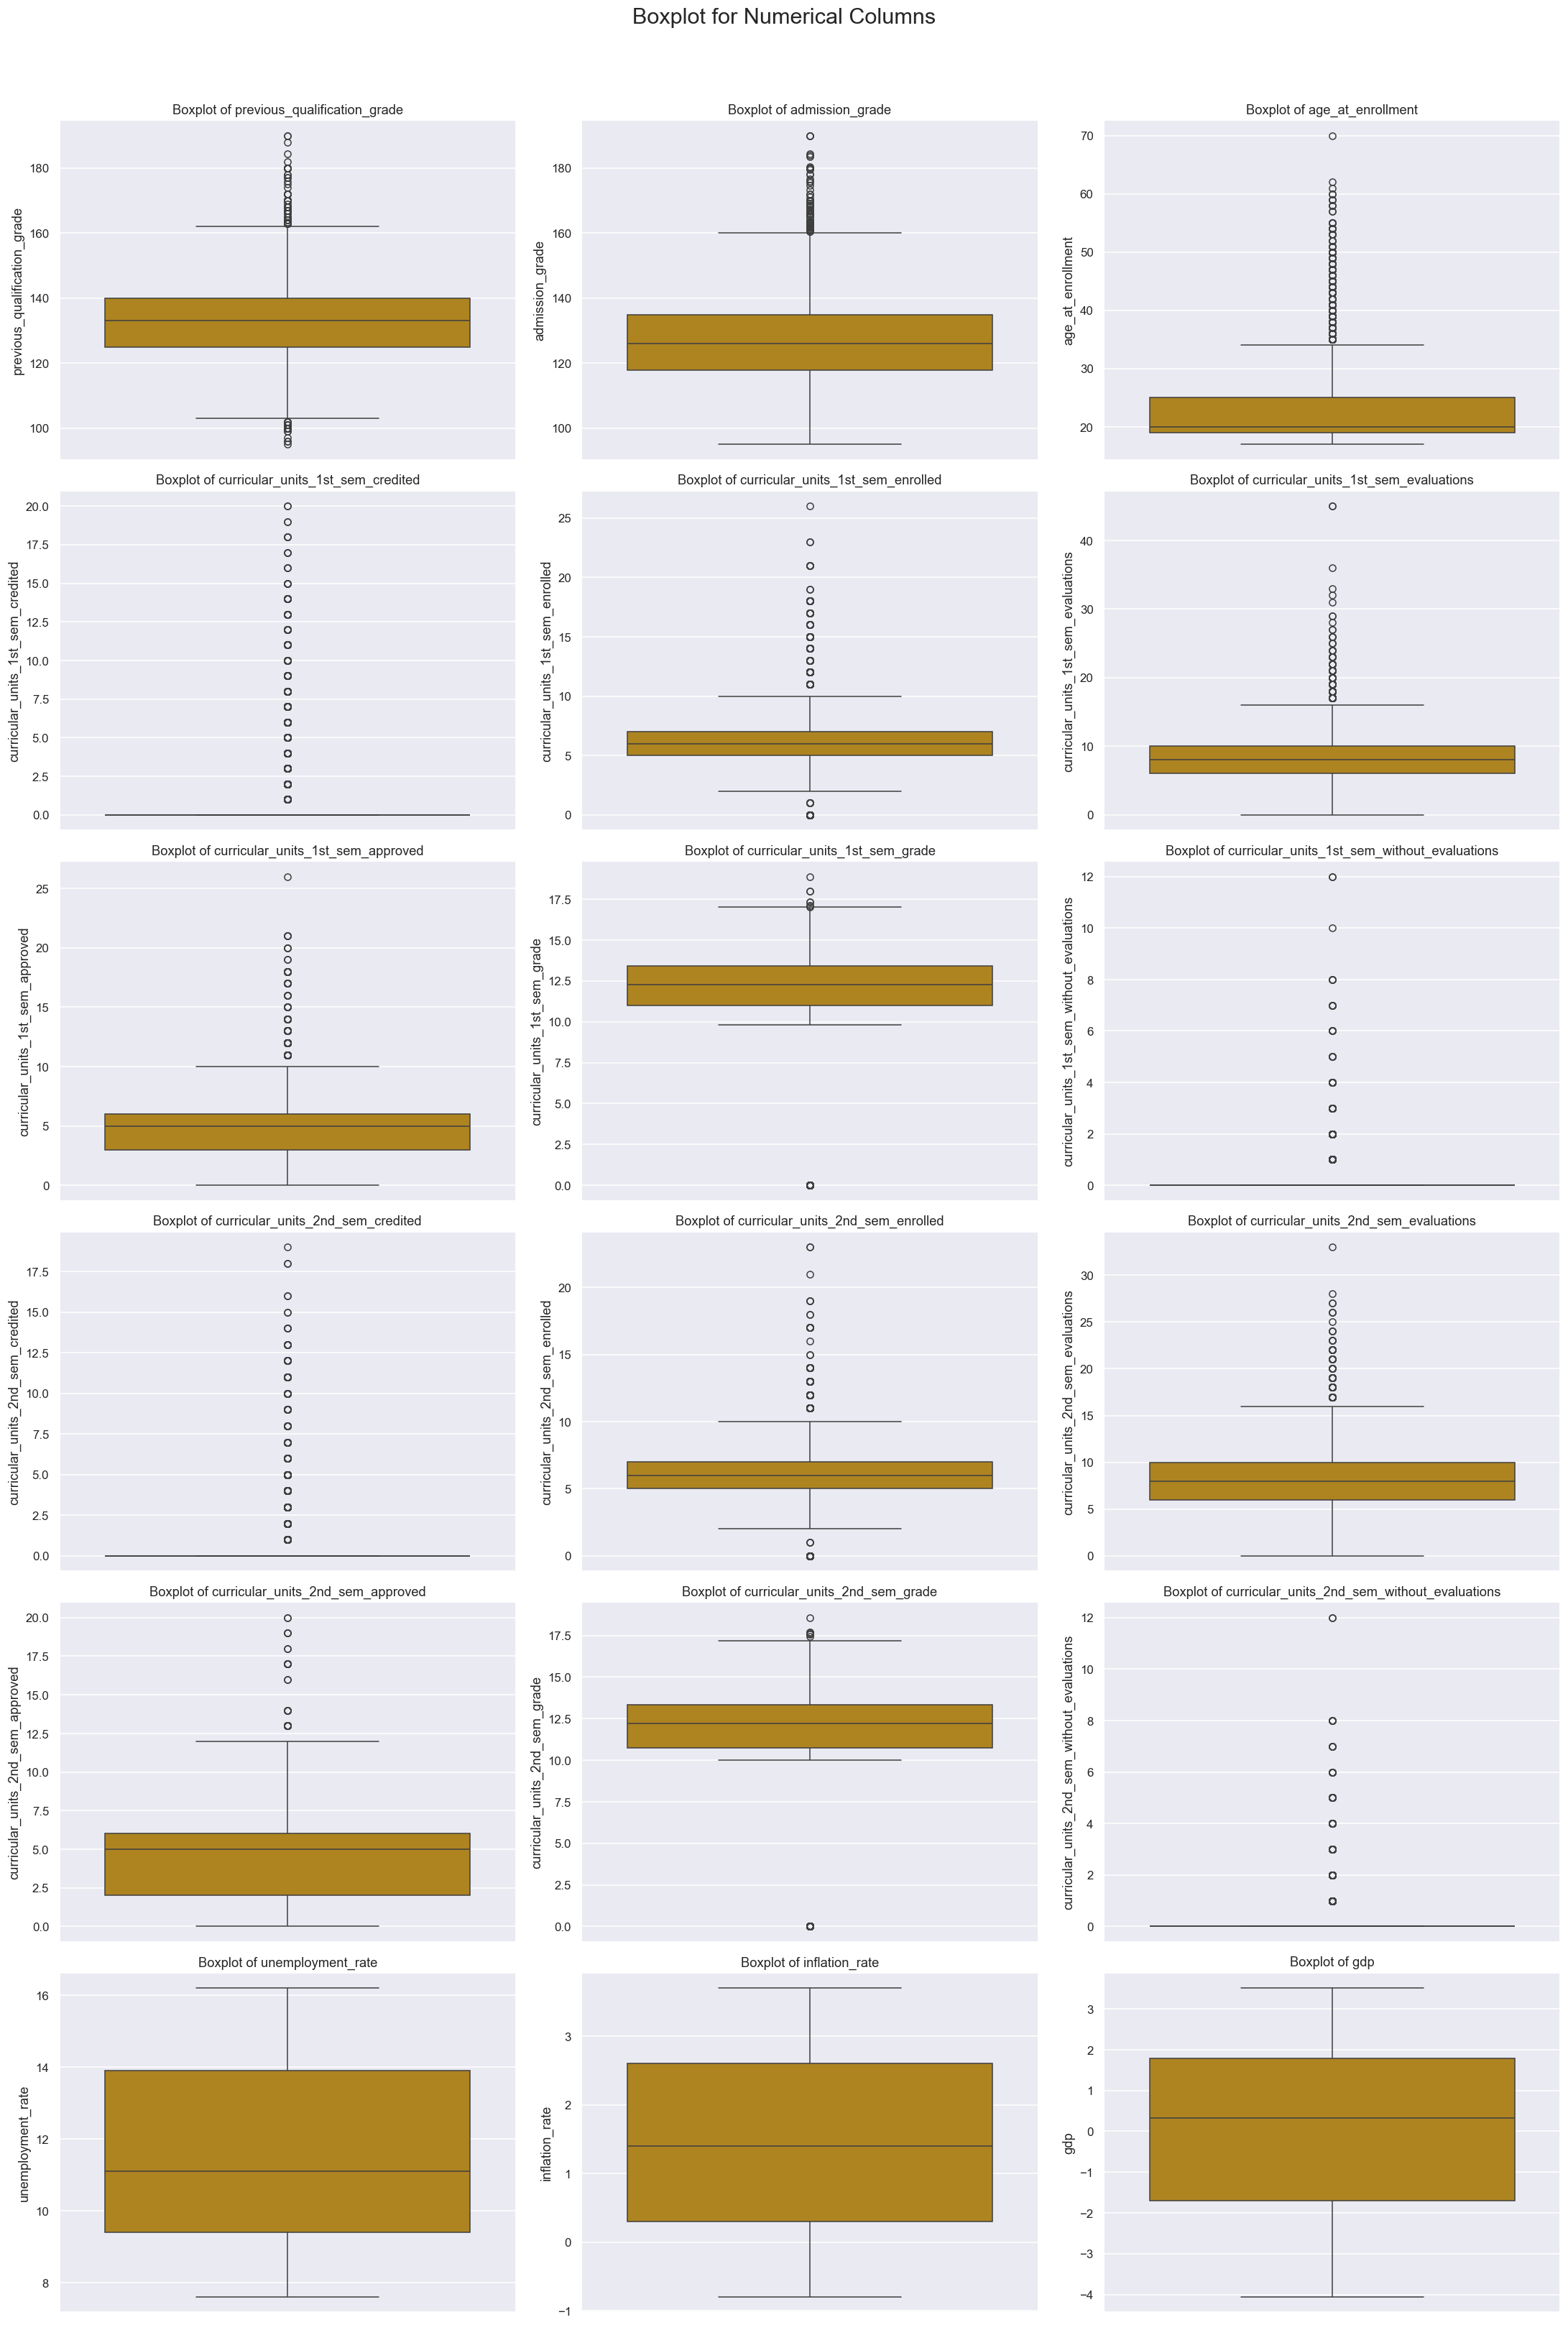

In [36]:
"""
We are going to use boxplot to visualize the outliers of numberical columns. 
"""

# Defining plot structure
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle("Boxplot for Numerical Columns", fontsize=20)

# Flattening the axes
axes = axes.flatten()

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    # Boxplot using seaborn library
    sns.boxplot(y=df[col], ax=axes[i], color="#C58E0A")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)


# Hiding the unused plots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Adjusting the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 ===========> Description regarding outliers

In [37]:
"""
Choosed Interquartile Range (IQR) method to remove the outliers from the dataset.
Here we are not removing the entire rows of outliers, we alter the values of outliers to the lower and upper limits.
"""

# Defining Q1, Q3 and IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining lower limit and upper limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removing the outliers
df_no_outliers = df.copy()
for col in numerical_columns:
    df_no_outliers[col] = df[col].clip(
        lower=lower_limit[col], upper=upper_limit[col])

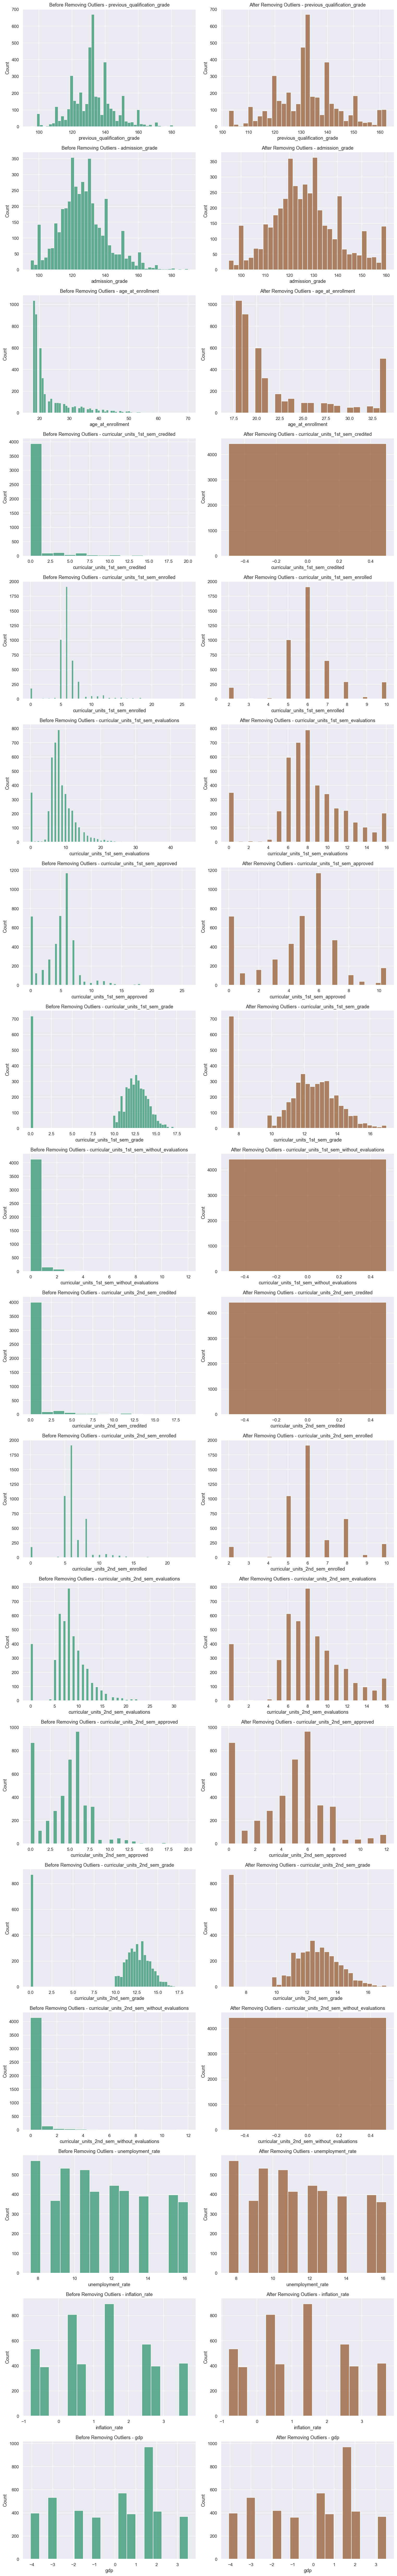

In [38]:
"""
Comparing the distribution of numberical columns before and after the alternations of outliers using histograms.
"""

# Defining the plot structure
fig, axes = plt.subplots(len(numerical_columns), 2,
                         figsize=(14, 5 * len(numerical_columns)))


for i, col in enumerate(numerical_columns):
    # Before removing outliers
    sns.histplot(data=df, x=col, ax=axes[i, 0], color='#329670')
    axes[i, 0].set_title(f'Before Removing Outliers - {col}')

    # After removing outliers
    sns.histplot(data=df_no_outliers, x=col, ax=axes[i, 1], color='#965c32')
    axes[i, 1].set_title(f'After Removing Outliers - {col}')

# Adjust overlapping
plt.tight_layout()
plt.show()

### Normalizing the Numerical columns   

In [39]:
"""
Normalizing the numerical columns using MinMaxScaler. 
"""

# Initializing the minmax scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns only
df_no_outliers[numerical_columns] = scaler.fit_transform(df_no_outliers[numerical_columns])

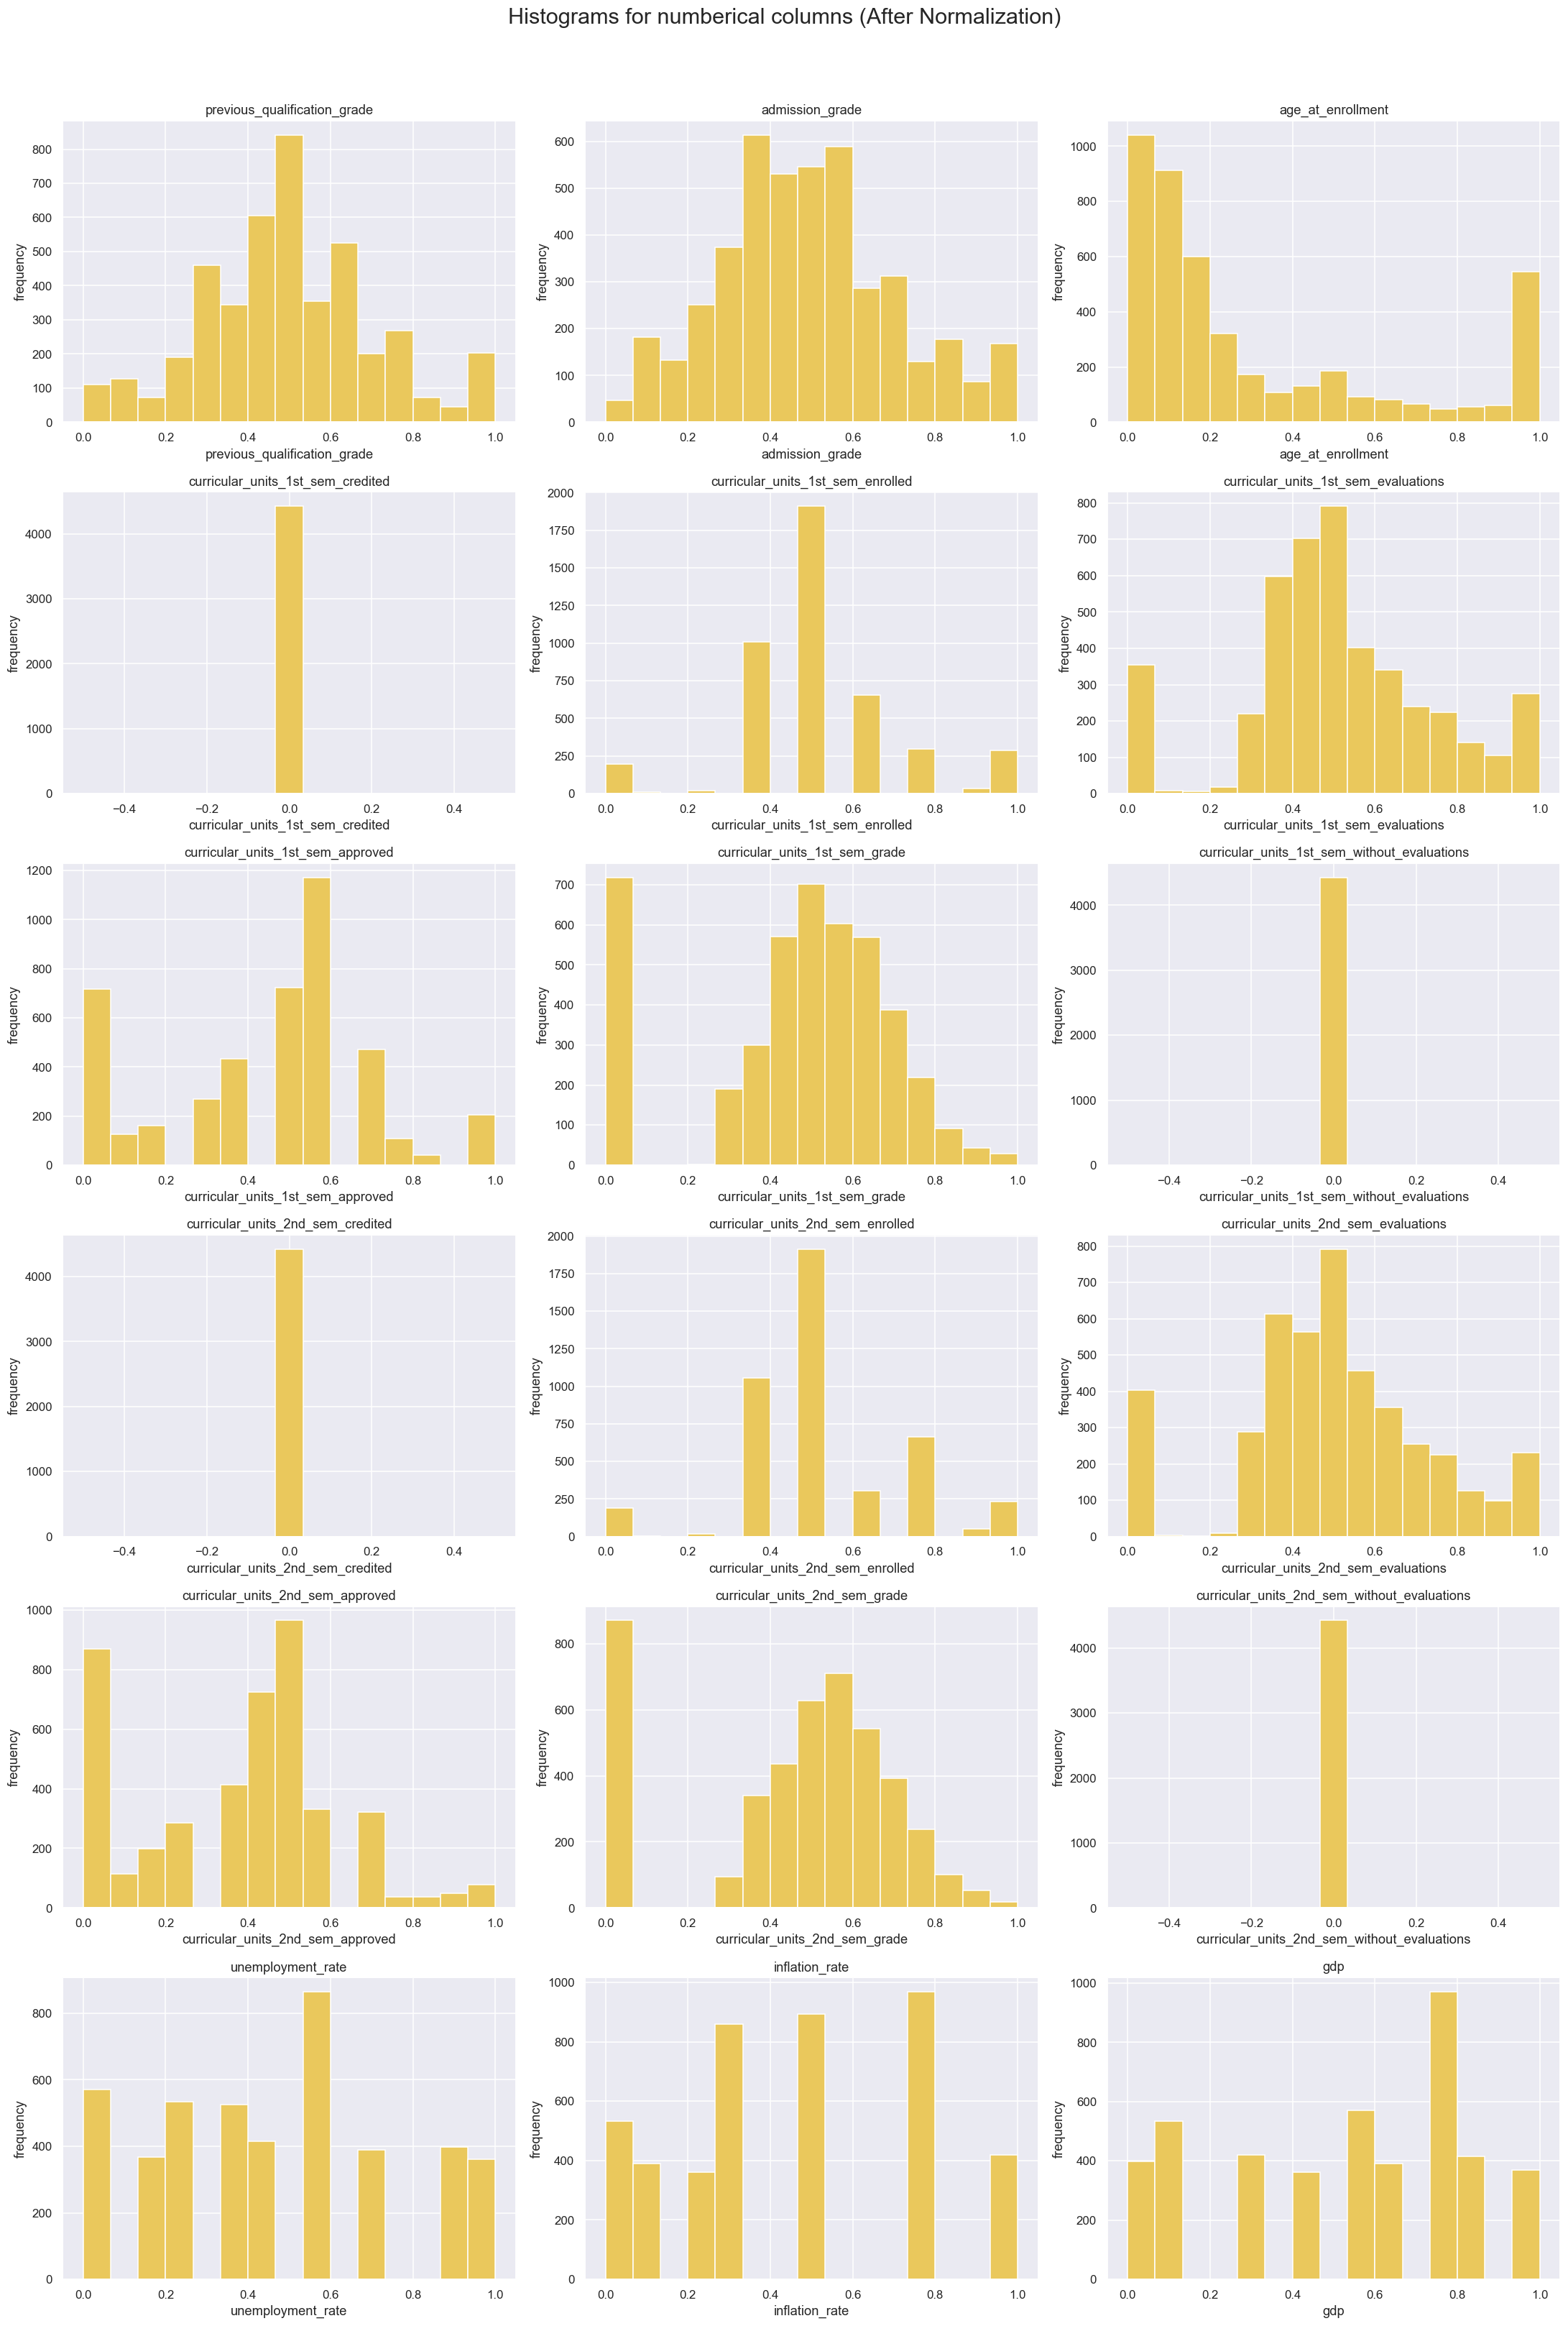

In [40]:
""" 
Visualizing the distribution of numberical columns after normalization using histograms.
"""

# Defining diagram size to plot scatter plots in 1 diagram
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle(
    "Histograms for numberical columns (After Normalization)", fontsize=20)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each pair of columns (x vs y)
for i, col in enumerate(numerical_columns):
    axes[i].hist(df_no_outliers[col], bins=15, color="#eac85c")
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("frequency")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()